In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from mpl_toolkits import mplot3d

In [17]:
def get8ShapeTrajectory(start_point, # 3D start point [m, m, m]
                        radius, # [m]
                        fixed_height = False,
                        height_variation = 0.5,  # [m]
                        debug = False,
                        write_file = False):

  x = np.array([])
  y = np.array([])
  z = np.array([])
  heading = np.array([])

  # The number of poses in the trajectory is proportional to the eight perimeter
  eight_shape_perimeter = 2 * (2 * math.pi * radius)
  num_poses = round(eight_shape_perimeter * 0.5) 

  for i in np.linspace(0, 2 * math.pi, num_poses):
    x = np.append(x, start_point[0] + radius * math.sin(i))
    y = np.append(y, start_point[1] + radius * math.sin(i) * math.cos(i))

  # If you are working with flying robot, you can make the robot moves up and down during the trajectory, setting the flag 'fixed_height' to False
  if not fixed_height:
    z = np.array([start_point[2] + (height_variation * math.sin(i)) for i in np.linspace(0, 2 * math.pi, num_poses)])
  else:
    z = np.full(num_poses, start_point[2])

  for i in range(num_poses - 1):
    heading = np.append(heading, math.atan2(y[i + 1] - y[i], x[i + 1] - x[i]))

  heading = np.append(heading, math.atan2(y[0] - y[-1], x[0] - x[-1]))

  # Display useful information about the trajectory
  if debug:
    dist_between_points = np.array([])
    for i in range(num_poses - 1):
      dist_between_points = np.append(dist_between_points, math.pow(x[i] - x[i + 1], 2) + math.pow(y[i] - y[i + 1], 2))

    print("Number of poses in the trajectory: %d"%(num_poses))
    print("Average distance between the points: %.2f"%(np.average(dist_between_points)))
    print("Standard deviation of the distances: %.2f"%(np.std(dist_between_points)))

  if write_file:
    with open("eight_shape_trajectory.txt", "w") as f:
      for i in range(num_poses):
        f.write("%.2f %.2f %.2f %.2f\n"%(x[i], y[i], z[i], heading[i]))

  return x, y, z, heading

In [18]:
x, y, z, heading = get8ShapeTrajectory([5, 10, 3], 15, False, debug = True, write_file = False)

Number of poses in the trajectory: 94
Average distance between the points: 1.03
Standard deviation of the distances: 0.51


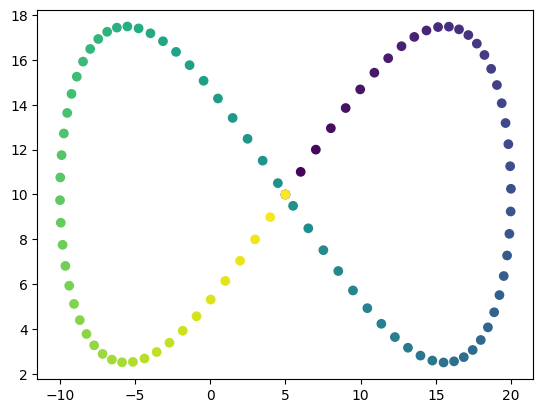

In [19]:
color = np.linspace(0, 2 * math.pi, len(x))

plt.scatter(x, y, c = color)
plt.show()

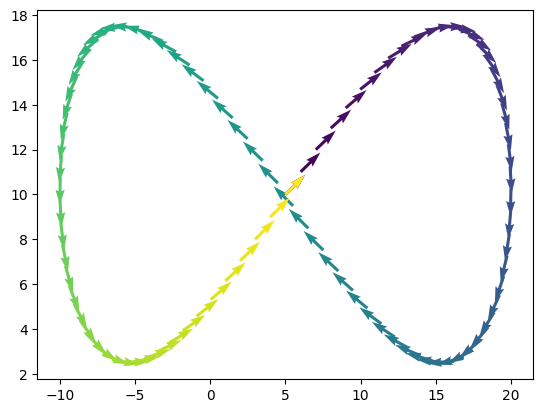

In [20]:
u = np.array([math.cos(h) for h in heading])
v = np.array([math.sin(h) for h in heading])

colors = np.linspace(0, 2 * math.pi, len(x))

norm = Normalize()
norm.autoscale(colors)

plt.quiver(x, y, u, v, color = cm.viridis(norm(colors)))
plt.show()

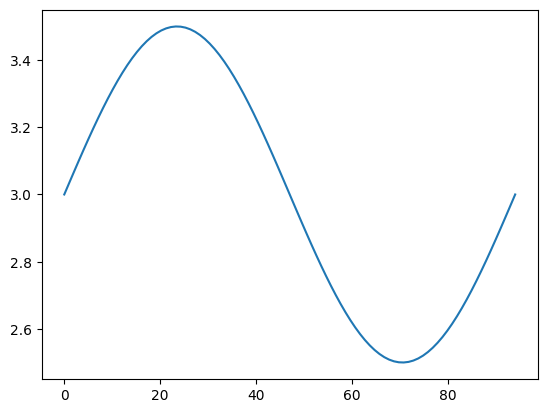

In [21]:
t = np.linspace(0, len(z), len(z))
plt.plot(t, z)
plt.show()

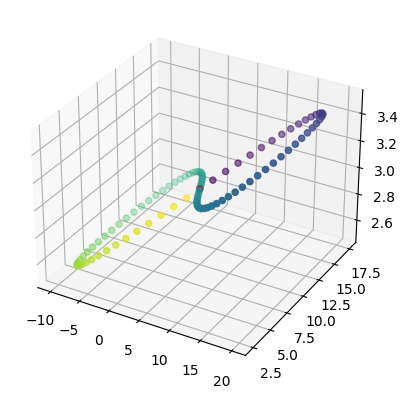

In [22]:
fig = plt.figure()
ax = plt.axes(projection='3d')

color = np.linspace(0, 2 * math.pi, len(x))
ax.scatter3D(x, y, z, c = color)